# Lab 1

In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# test config settings
increasing pretrigger delay to capture more baseline info
* test 0
    - defaults in [camis.json](https://github.com/UCB-NE-204-2022/lab0_data/blob/main/CAMIS.json) except: 
        - pretrigger delay 500
        - trigger threshold 120
        - sample length 50000
        - invert signal false
        - 60 seconds
* test 1
    - pretrigger delay changed to 1500
    - 60 seconds
* test 2
    - pretrigger 1000
    - 60 seconds
* test 3
    - pretrigger 3200 (800 ns)
    - 10 seconds

In [3]:
# test0
f_name = 'data/22_09_23/test0.h5'
f_data = h5py.File(f_name,'r')
raw_data0 = f_data['raw_data'][()]
print(raw_data0.shape)
# test1
f_name = 'data/22_09_23/test1.h5'
f_data = h5py.File(f_name,'r')
raw_data1 = f_data['raw_data'][()]
print(raw_data1.shape)

#test2
f_name = 'data/22_09_23/test2.h5'
f_data = h5py.File(f_name,'r')
raw_data2 = f_data['raw_data'][()]
print(raw_data2.shape)

#test3
f_name = 'data/22_09_23/test3.h5'
f_data = h5py.File(f_name,'r')
raw_data3 = f_data['raw_data'][()]
print(raw_data3.shape)

(2087, 50000)
(2085, 50000)
(2075, 50000)
(1421, 50000)


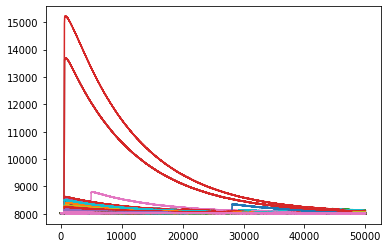

In [3]:
# plot all pulses
# last week
plt.figure()
for i in range(len(raw_data0)):
    plt.plot(raw_data0[i])
plt.show()

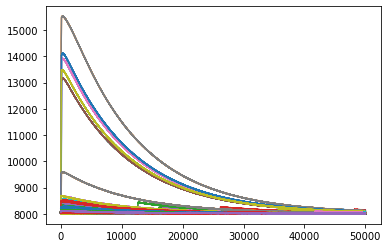

In [15]:
# plot all pulses
# last week
plt.figure()
for i in range(len(raw_data1)):
    plt.plot(raw_data1[i])
plt.show()

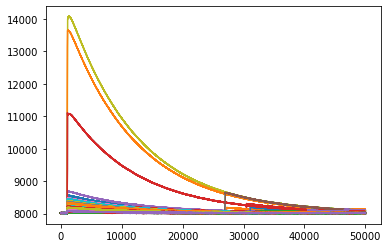

In [22]:
# plot all pulses
# last week
plt.figure()
for i in range(len(raw_data2)):
    plt.plot(raw_data2[i])
plt.show()

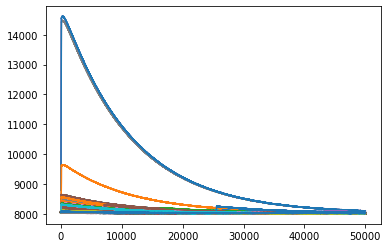

In [28]:
# plot all pulses
# last week
plt.figure()
for i in range(len(raw_data3)):
    plt.plot(raw_data3[i])
plt.show()

# check pre-trigger delay

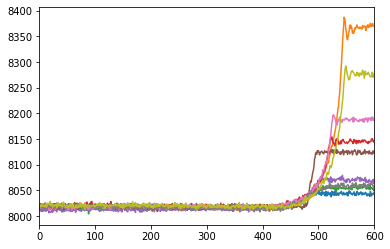

In [4]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data0))
    plt.plot(raw_data0[n])
plt.xlim(0,600)
plt.show()

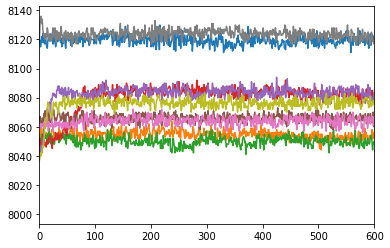

In [5]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data1))
    plt.plot(raw_data1[n])
plt.xlim(0,600)
plt.show()

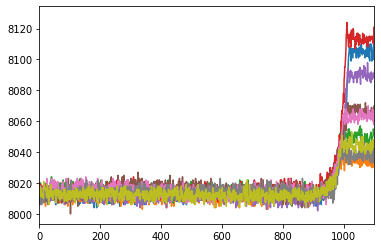

In [6]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data2))
    plt.plot(raw_data2[n])
plt.xlim(0,1100)
plt.show()

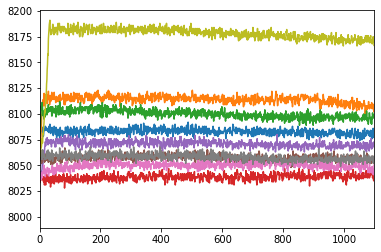

In [7]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data3))
    plt.plot(raw_data3[n])
plt.xlim(0,1100)
plt.show()

## calibration measurements 
Using test 2 config settings
* Cs-137
    - 10 minutes (600 seconds)
* Co-60
    - 10 minutes (600 seconds)
* Co-57
    - 10 minutes (600 seconds)

In [9]:
f_name = 'data/22_09_23/cs137.h5'
f_data = h5py.File(f_name,'r')
cs137 = f_data['raw_data'][()]
print(cs137.shape)
# invert pulses false, 500 trigger delay, 120 trigger threshold
f_name = 'data/22_09_23/co60.h5'
f_data = h5py.File(f_name,'r')
co60 = f_data['raw_data'][()]
print(co60.shape)

f_name = 'data/22_09_23/co57.h5'
f_data = h5py.File(f_name,'r')
co57 = f_data['raw_data'][()]
print(co57.shape)

(5410, 50000)
(5396, 50000)
(6046, 50000)


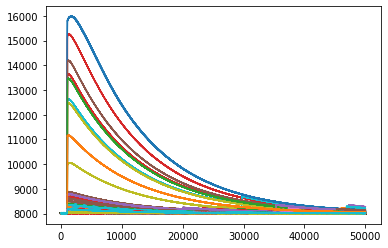

In [10]:
plt.figure()
for i in range(len(cs137)):
    plt.plot(cs137[i])
plt.show()

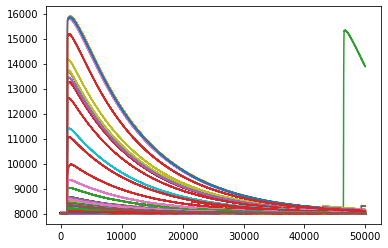

In [11]:
plt.figure()
for i in range(len(co60)):
    plt.plot(co60[i])
plt.show()

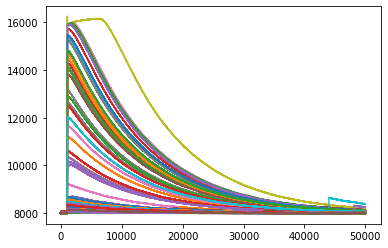

In [12]:
plt.figure()
for i in range(len(co57)):
    plt.plot(co57[i])
plt.show()

## random subset of pulses

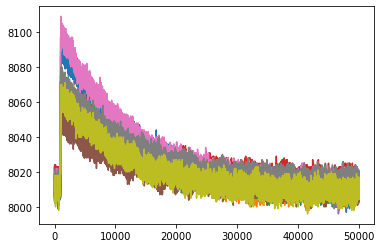

In [16]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(cs137))
    plt.plot(cs137[n])
plt.show()

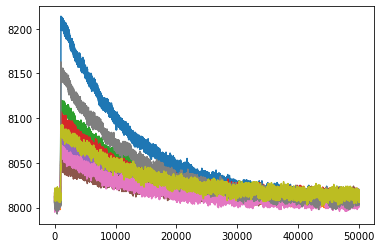

In [17]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(co60))
    plt.plot(co60[n])
plt.show()

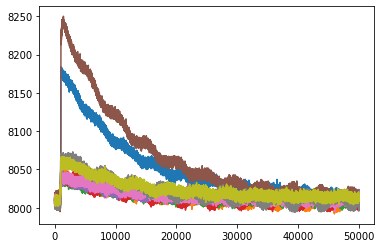

In [23]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(co57))
    plt.plot(co57[n])
plt.show()